# Analyse the PlantGrowth R dataset

***
#### Applied Statistics project, HDip in Data Analysis at ATU
####  

#### Author: Shane Keenan 
#### Submission due date: 20/12/2024   
#### Status: Ongoing

***

### Project description (from Lecturer Ian McLoughlin )

<span style="color:lightblue">  

In this project, you will analyze the [PlantGrowth R dataset](https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv).
You will find [a short description](https://vincentarelbundock.github.io/Rdatasets/doc/datasets/PlantGrowth.html) of it on [Vicent Arel-Bundock's Rdatasets page](https://vincentarelbundock.github.io/Rdatasets/).
The dataset contains two main variables, a treatment group and the weight of plants within those groups.

Your task is to perform t-tests and ANOVA on this dataset while describing the dataset and explaining your work.
In doing this you should:

1. Download and save the dataset to your repository.

2. Describe the data set in your notebook.

3. Describe what a t-test is, how it works, and what the assumptions are.

3. Perform a t-test to determine whether there is a significant difference between the two treatment groups `trt1` and `trt2`.

4. Perform ANOVA to determine whether there is a significant difference between the three treatment groups `ctrl`, `trt1`, and `trt2`.

5. Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.

</span>

#### import the necessary python packages 

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import random 
from PIL import Image
import os
%matplotlib inline

from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')  # For Retina displays or high-res screens


C:\Users\shane\AppData\Local\Temp\ipykernel_27992\44405657.py:13: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')  # For Retina displays or high-res screens


#### Import the Plant Growth data set from PlantGrowth.csv as a DataFrame and display the data 

In [51]:
#get the current working directory 
current_directory = os.getcwd()
# relative path from the notebook to the Excel file in the data folder
relative_path_data = "data\\PlantGrowth.csv"
# Join the two 
file_path_data = os.path.join(current_directory, relative_path_data)

data = pd.read_csv(file_path_data) # import the .CSV file 
data = data.drop('rownames', axis=1) # drop the rownames column 3

data

,weight,group
0,4.17,ctrl
1,5.58,ctrl
2,5.18,ctrl
3,6.11,ctrl
4,4.50,ctrl
5,4.61,ctrl
6,5.17,ctrl
7,4.53,ctrl
8,5.33,ctrl
9,5.14,ctrl


In [52]:
data.info() # what are the python data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   weight  30 non-null     float64
 1   group   30 non-null     object 
dtypes: float64(1), object(1)
memory usage: 612.0+ bytes


### Plant Growth Data set description

The `PlantGrowth` dataset is a built-in dataset included in the statistical software package R. It gives the results from an experiment with an aim to identify the impact of different treatments on the growth of plants. Three groups were analyzed: a control group and two treatment groups. No information is give as to the nature of the treatment; possibily food, CO2 levels or light exposure was varied. 

The plant yield is compared (as measured by dried weight of plants presumably in [g]) obtained under a control and two different treatment conditions.

A dataset of 30 cases of 2 variables.
- `weight`: The weight of the plant.
- `group`: The treatment group to which the plant belongs. The levels of group are control - `‘ctrl’`, treatment1 - `‘trt1’`, and treatment 2 - `‘trt2’` with 10 samples in each group.


`weight` is expressed as a numberical real varaible with precision to two decimal places and represented by floating point numbers in python (float64).
In statistical terms, where scale of measurement refers to the way variables are defined and categorized (in statistics: *nominal*, *ordinal*, *interval*, and *ratio*), the weight variable is Ratio scale as they have a true zero point (0 kg) and allow for differences between values to be determined. 
`group` is a cattegorical variable and represented as an object in python. 


In Python, we use the pandas library to store the variables of both types (numerical and cattegorical) in to a `DataFrame`. From here we can easily maniplate the data and handle the different data types together. 


Reference: 

[1] PlantGrowth R dataset source: https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv

[2] Description Vicent Arel-Bundock's Rdatasets page: https://vincentarelbundock.github.io/Rdatasets/doc/

[3] R documentation: https://rdocumentation.org/packages/datasets/versions/3.6.2/topics/PlantGrowth

[4] Types of Variable: https://statistics.laerd.com/statistical-guides/types-of-variable.php

[5] Levels of Measurement | Nominal, Ordinal, Interval and Ratio: https://www.scribbr.com/statistics/levels-of-measurement/





### Exploratory data analysis 

The most apppropriate summary statistics to describe the numerical quantitative variable (*weight*) in the `PlantGrowth` dataset would be to determine the *mean*, *standard deviation*, *minimum and maximum* and *quartiles*. 

For the *categorical variable* (*group*), statistics we can determine is *Frequency* and *proportionality* (percentage of each category). 

Although the sample size is small (N = 10 samples in each group) the groups are proportional with exactly 1/3 in each. 

 `.describe()` generates all the summary statistics for the whole data set.

In [53]:
data.describe()

,weight
count,30.000000
mean,5.073000
std,0.701192
min,3.590000
25%,4.550000
50%,5.155000
75%,5.530000
max,6.310000


Using `.groupby()` and specifying `'group'` allows us to get the summary statistics for each of the 3 groups - `‘ctrl’`, `‘trt1’`, `‘trt2’` individually 

In [54]:
data.groupby('group').describe()

weight                                                    
       count   mean       std   min     25%    50%     75%   max
group                                                           
ctrl    10.0  5.032  0.583091  4.17  4.5500  5.155  5.2925  6.11
trt1    10.0  4.661  0.793676  3.59  4.2075  4.550  4.8700  6.03
trt2    10.0  5.526  0.442573  4.92  5.2675  5.435  5.7350  6.31

describe the summary statistics ....

## Histograms 

 
Bin number is set as the square root of the number of data points

number of bins = $ \sqrt{n} $.

bin width is the data range/number of bins.

first determine the data range for each group using the summary statistics 
​


In [55]:
summary_stats = data.groupby('group')['weight'].describe()

# Extract the statistics for the 'ctrl' group
#summary_stats_ctrl = summary_stats.loc['ctrl']

# Extract the min and max for each group and calculate the range
range = summary_stats['max'] - summary_stats['min']
range_ctrl = range['ctrl']
range_trt1 = range['trt1']
range_trt2 = range['trt2']
range

group
ctrl    1.94
trt1    2.44
trt2    1.39
dtype: float64

Plot the histogram for each group individually on the same figure. set the xlim the same for each. Label indicates the bin width for each. 

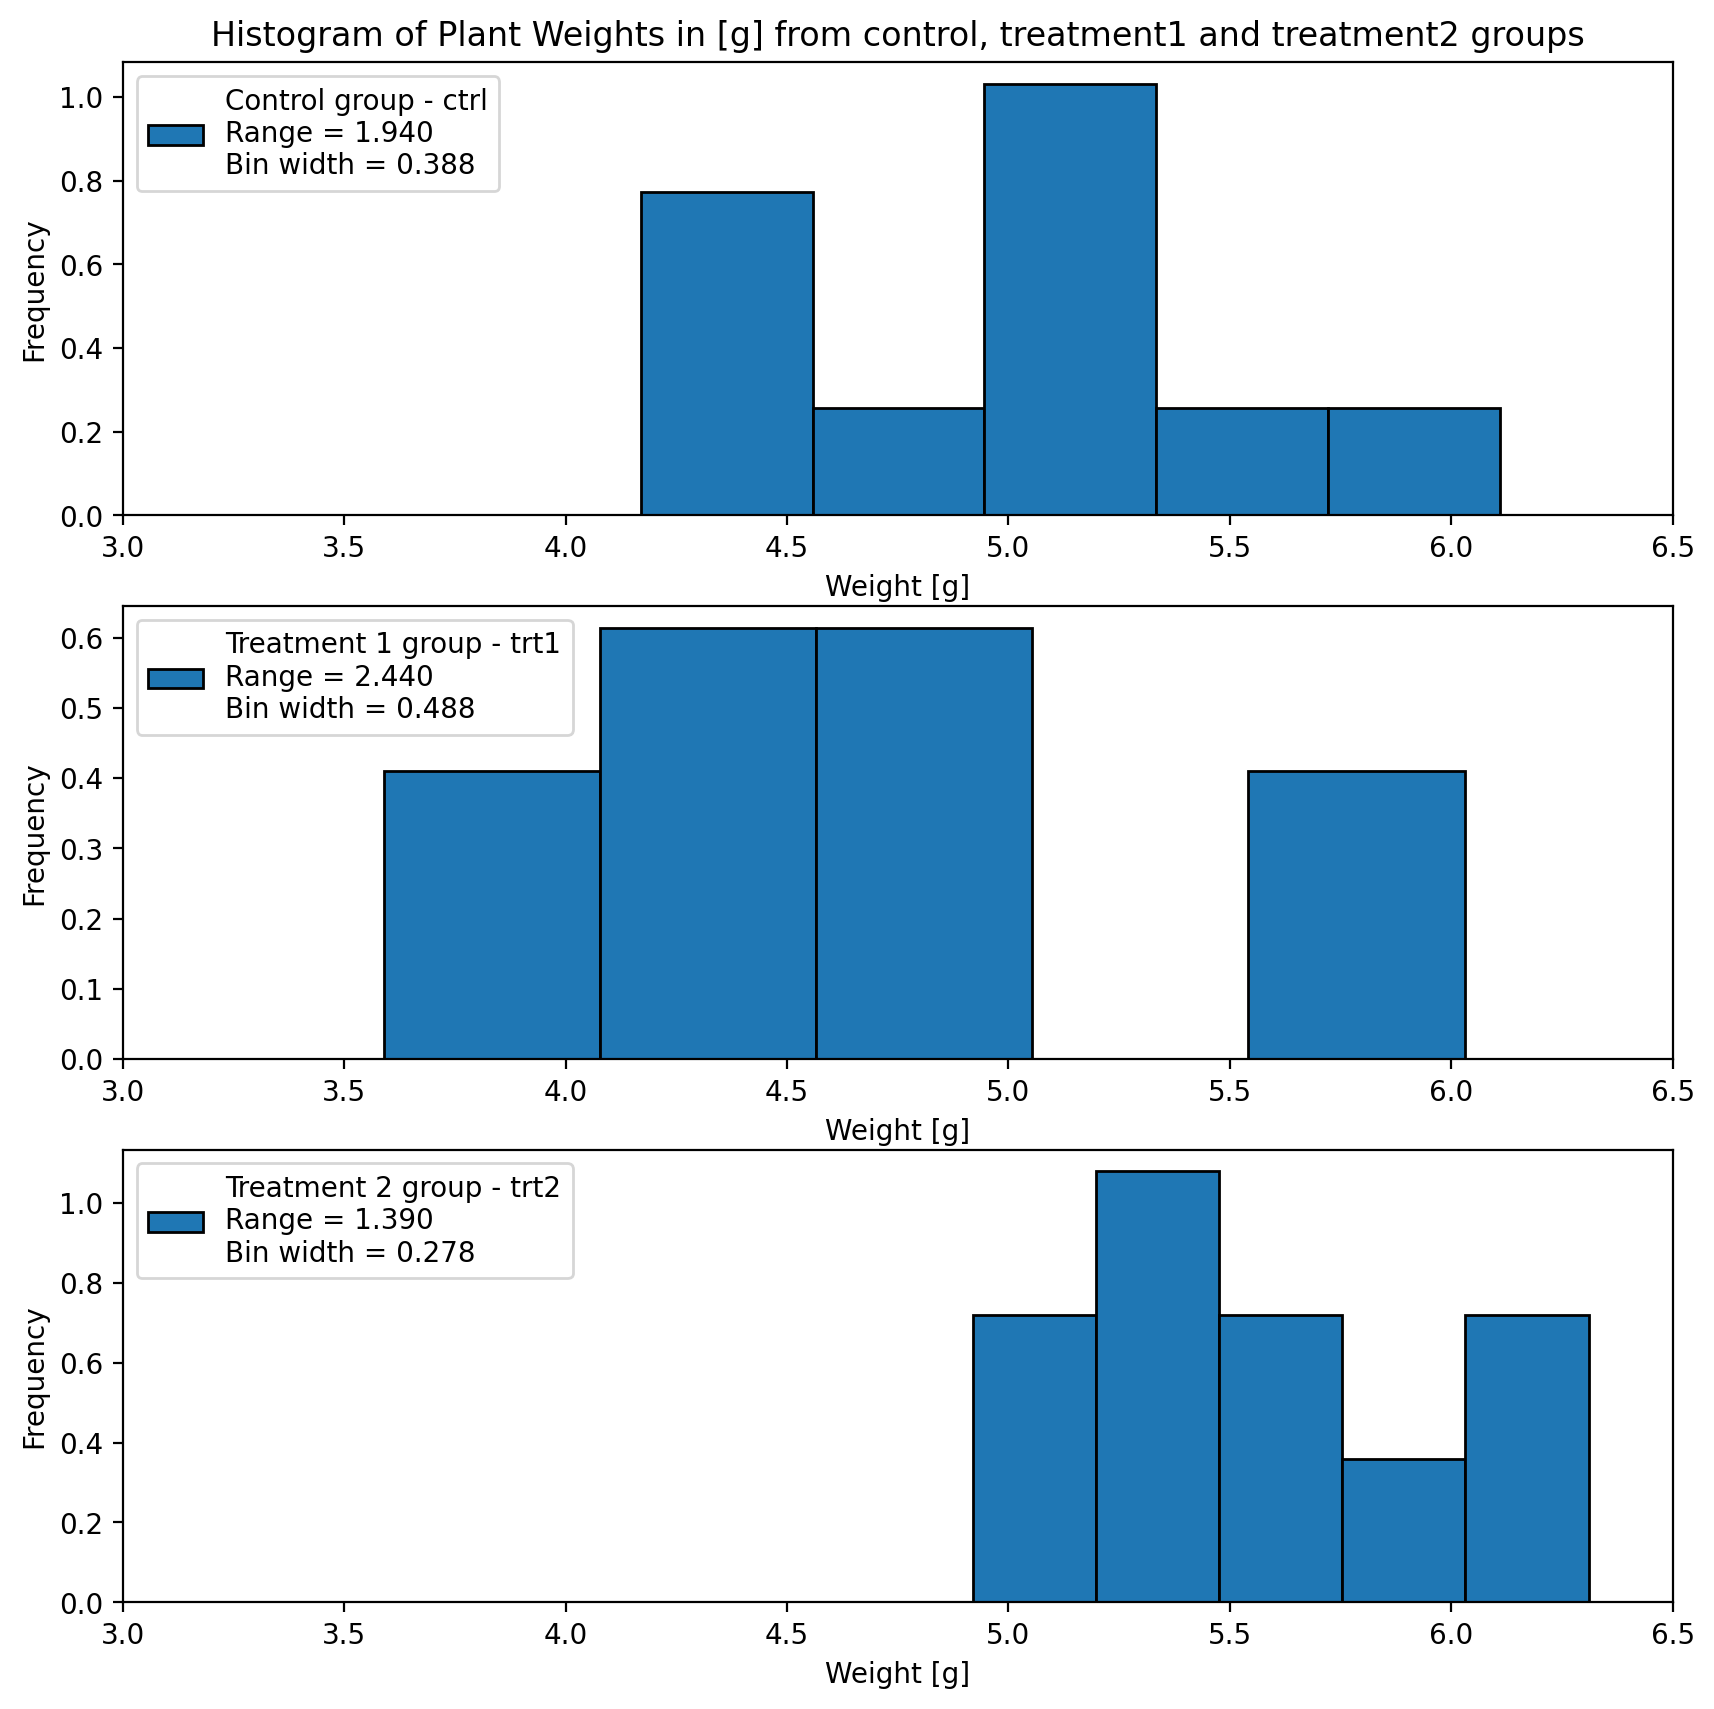

In [56]:
bins=5
fig, ax = plt.subplots(3,1, figsize=(10, 10))
ax[0].hist(data[data['group'] == 'ctrl']['weight'], bins=bins, density=True, label=f'Control group - ctrl\nRange = {range_ctrl:.3f}\nBin width = {range_ctrl/bins:.3f}', edgecolor='black')
ax[0].set_title('Histogram of Plant Weights in [g] from control, treatment1 and treatment2 groups')
ax[0].set_xlabel('Weight [g]')
ax[0].set_ylabel('Frequency')
ax[0].set_xlim(3, 6.5)
ax[0].legend(loc='upper left')
ax[1].hist(data[data['group'] == 'trt1']['weight'], bins=bins, density=True, label=f'Treatment 1 group - trt1\nRange = {range_trt1:.3f}\nBin width = {range_trt1/bins:.3f}', edgecolor='black')
ax[1].set_title('')
ax[1].set_xlabel('Weight [g]')
ax[1].set_ylabel('Frequency')
ax[1].set_xlim(3, 6.5)
ax[1].legend(loc='upper left')
ax[2].hist(data[data['group'] == 'trt2']['weight'], bins=bins, density=True, label=f'Treatment 2 group - trt2\nRange = {range_trt2:.3f}\nBin width = {range_trt2/bins:.3f}', edgecolor='black')
ax[2].set_title('')
ax[2].set_xlabel('Weight [g]')
ax[2].set_ylabel('Frequency')
ax[2].set_xlim(3, 6.5)
ax[2].legend(loc='upper left')
plt.show()

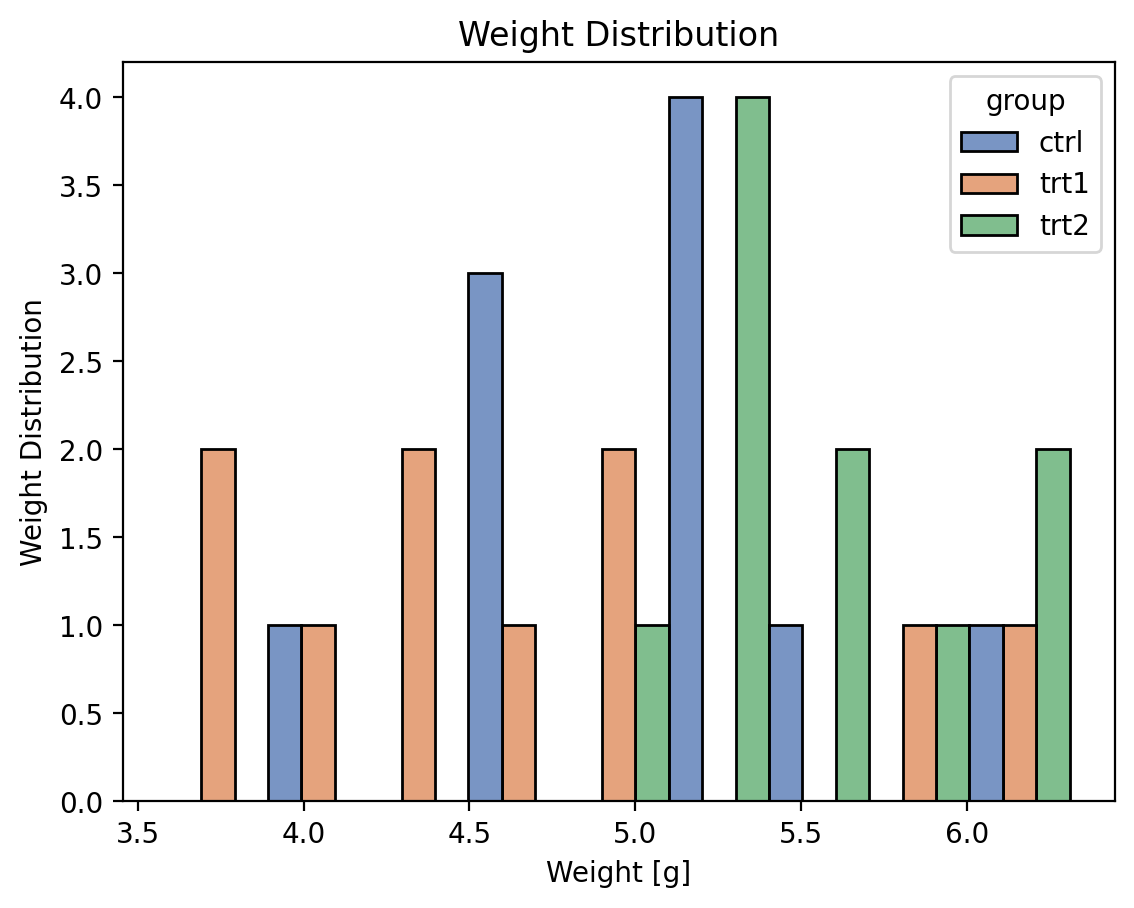

In [57]:
sns.histplot(data, x=data['weight'], hue='group', multiple="dodge", palette='deep', binwidth=0.3).set(
        title='Weight Distribution',xlabel='Weight [g]', ylabel='Weight Distribution') # multiple = "dodge" - Offsets the bars

plt.show() 

## Boxplots 

The plot shows the range, interquartile range, median, outliers, and all quartiles of the data set.
The red line indicates the median of the data, the green triangle the mean value, open circles indcicate outlier points(note the control and treatment 2 group don't have outliers)

Image below shows the features of the box plot [1]

![image info](https://i0.wp.com/statisticsbyjim.com/wp-content/uploads/2019/01/boxplot_pdf.png?w=437&ssl=1)


[1] https://statisticsbyjim.com/graphs/box-plot/#more-19849 




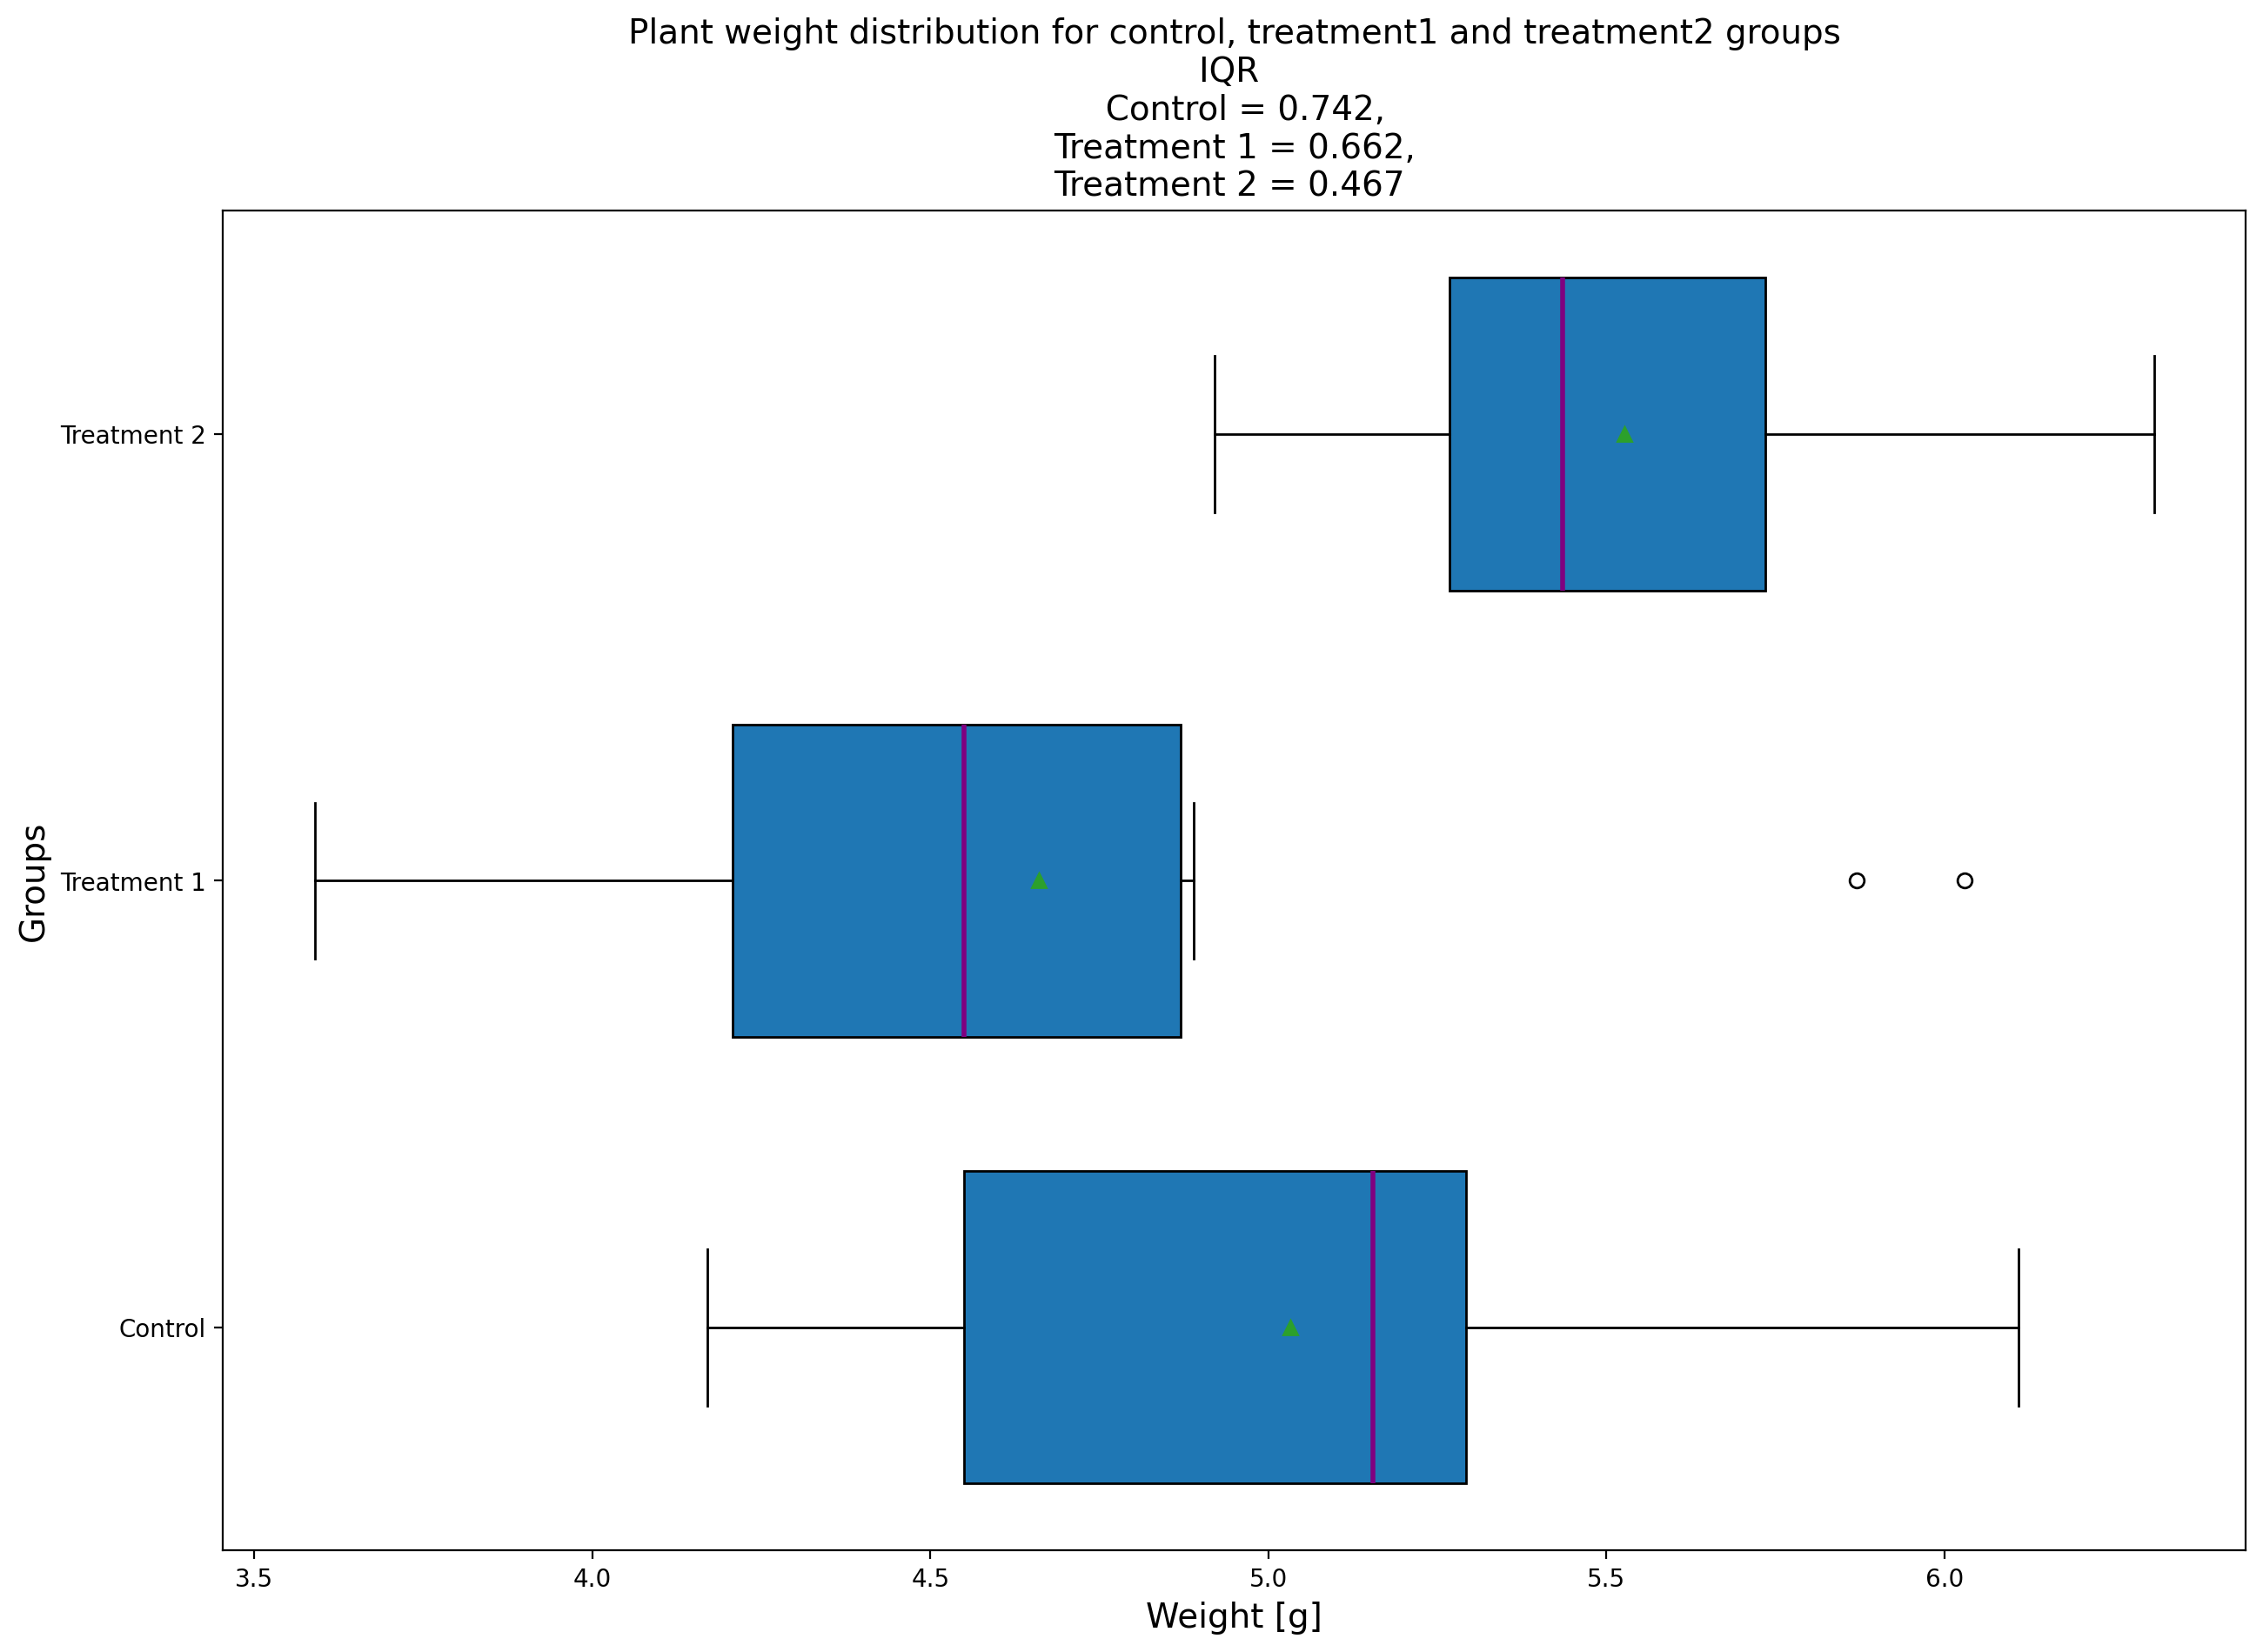

In [58]:
# determine the interquartile range for each group. 
IQR = summary_stats['75%'] - summary_stats['25%']
IQR_ctrl = IQR['ctrl']
IQR_trt1 = IQR['trt1']
IQR_trt2 = IQR['trt2']

#  create figure 
fig, ax = plt.subplots(1, figsize=(15, 10))
A = [data[data['group'] == 'ctrl']['weight'],data[data['group'] == 'trt1']['weight'],data[data['group'] == 'trt2']['weight']]
ax.boxplot(A, tick_labels =('Control','Treatment 1','Treatment 2'),vert=False,widths = 0.7, patch_artist=True, showmeans=True, meanprops={'linewidth': 2, 'color': 'red'},medianprops={'linewidth': 2, 'color': 'purple'})
ax.set_title(f'Plant weight distribution for control, treatment1 and treatment2 groups\nIQR \n  Control = {IQR_ctrl:.3f},\nTreatment 1 = {IQR_trt1:.3f},\nTreatment 2 = {IQR_trt2:.3f} ', fontsize = 14)
ax.set_xlabel("Weight [g]", fontsize = 14)
ax.set_ylabel("Groups", fontsize=14) 
plt.show()

Incites from histograms and boxplots 

- The median weight (50%) for “ctrl” is higher than “trt1” but lower than “trt2”. This
indicates that on average, the plants in “trt2” grew the most, while those in
“trt1” grew the least.
- The “ctrl” group has the broadest interquartile range, indicating greater
variability in plant growth. The “trt2” group has a narrow interquartile
range, indicating less variability in plant growth. “Trt1” is somewhere in the
middle between the other two.

- The “trt1” group has two outliers on the upper side, which means there’s at
least some plants in this group that grew exceptionally well compared to
others in the same group.

- The boxes for “ctrl” and “trt1” have significant overlap, indicating similar
distributions for these groups. The “trt1” box is distinctly lower, indicating
that this group’s plant growth is generally lesser than the other two groups.



### t-tests 


What is a T Test?
A t test is a statistical hypothesis test that assesses sample means to draw conclusions about population means. Frequently, analysts use a t test to determine whether the population means for two groups are different. For example, it can determine whether the difference between the treatment and control group means is statistically significant.[1]







[1] https://statisticsbyjim.com/hypothesis-testing/t-test/
